In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.metrics import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.estimator import *
from tensorflow.keras.models import *
from tensorflow_core.python.keras.layers import CuDNNLSTM
from tensorflow_core.python.keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow_core.python.keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.utils.data_utils import Sequence
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import linear_model
import os
import pandas as pd
import glob
import pathlib
import math

In [2]:
df=pd.read_csv('C://Users//elif_//OneDrive - Reseau-GES//IABD2//Semestre2//reinforcement//Kaggle//train.csv') #training set list
columns=["healthy", "multiple_diseases", "rust", "scab"]
df_test=pd.read_csv('C://Users//elif_//OneDrive - Reseau-GES//IABD2//Semestre2//reinforcement//Kaggle//test.csv') #testing set list

#appending .jpg so that we can dirctly read the images from "image_id" column
df['image_id'] = df['image_id'].astype(str)+".jpg"
df_test['image_id'] = df_test['image_id'].astype(str)+".jpg"


In [3]:
BATCH_SIZE = 32
IMG_WIDGHT = 300
IMG_HEIGH = 300

#data augmentation
datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

#training data 
train_generator=datagen.flow_from_dataframe(
    dataframe=df[:1460],
    directory='C://Users//elif_//OneDrive - Reseau-GES//IABD2//Semestre2//reinforcement//Kaggle//images',
    x_col="image_id",
    y_col=columns,
    batch_size=BATCH_SIZE,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(IMG_WIDGHT,IMG_HEIGH))


#validation data
valid_generator=test_datagen.flow_from_dataframe(
    dataframe=df[1460:],
    directory='C://Users//elif_//OneDrive - Reseau-GES//IABD2//Semestre2//reinforcement//Kaggle//images',
    x_col="image_id",
    y_col=columns,
    batch_size=BATCH_SIZE,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(IMG_WIDGHT,IMG_HEIGH))


#test data
test_generator=test_datagen.flow_from_dataframe(
    dataframe=df_test,
    directory='C://Users//elif_//OneDrive - Reseau-GES//IABD2//Semestre2//reinforcement//Kaggle//images',
    x_col="image_id",
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(IMG_WIDGHT,IMG_HEIGH))

X_train, y_train = train_generator.next()
X_test, y_test = valid_generator.next()

Found 1460 validated image filenames.
Found 361 validated image filenames.
Found 1821 validated image filenames.


(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


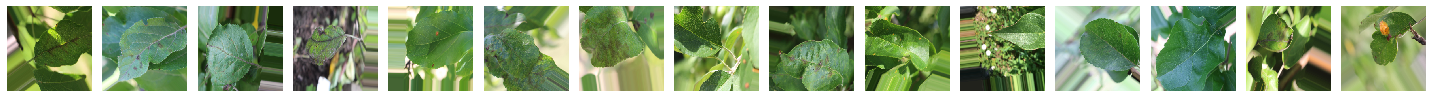

In [4]:
# plot some images

sample_training, _ = next(train_generator)

def plotImage(images):
    fig, axes = plt.subplots(1, 15, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        print(img.shape)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImage((sample_training[:15]))

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

model = Sequential()
model.add(Flatten(input_shape=(300, 300, 3)))
model.add(Dense(4, activation=softmax))
model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])




In [6]:
STEP_TRAIN=train_generator.n//train_generator.batch_size
STEP_VALID=valid_generator.n//valid_generator.batch_size
STEP_TEST=test_generator.n//test_generator.batch_size

print(STEP_TRAIN)
print(STEP_VALID)
print(STEP_TEST)

45
11
1821


In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True

In [8]:
history=model.fit_generator(generator=train_generator, 
                    steps_per_epoch=STEP_TRAIN, 
                    validation_data=valid_generator,
                    validation_steps=STEP_VALID,
                    epochs=150)

Epoch 1/150
45/45 [==============================] - 76s 2s/step - loss: 10.3413 - accuracy: 0.3333 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 2/150
45/45 [==============================] - 98s 2s/step - loss: 10.6069 - accuracy: 0.3410 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 3/150
45/45 [==============================] - 85s 2s/step - loss: 10.6517 - accuracy: 0.3382 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 4/150
45/45 [==============================] - 81s 2s/step - loss: 10.5977 - accuracy: 0.3424 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 5/150
45/45 [==============================] - 79s 2s/step - loss: 10.6741 - accuracy: 0.3368 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 6/150
45/45 [==============================] - 130s 3s/step - loss: 10.4996 - accuracy: 0.3473 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 7/150
45/45 [==============================] - 96s 2s/step - loss: 10.7992 - accuracy: 0.3298 - val_loss: 10.5775 - val_accuracy: 0.343

Epoch 58/150
45/45 [==============================] - 78s 2s/step - loss: 10.5595 - accuracy: 0.3452 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 59/150
45/45 [==============================] - 70s 2s/step - loss: 10.8077 - accuracy: 0.3305 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 60/150
45/45 [==============================] - 99s 2s/step - loss: 10.6239 - accuracy: 0.3424 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 61/150
45/45 [==============================] - 116s 3s/step - loss: 10.4495 - accuracy: 0.3529 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 62/150
45/45 [==============================] - 86s 2s/step - loss: 10.5397 - accuracy: 0.3452 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 63/150
45/45 [==============================] - 73s 2s/step - loss: 10.7050 - accuracy: 0.3361 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 64/150
45/45 [==============================] - 82s 2s/step - loss: 10.7566 - accuracy: 0.3326 - val_loss: 10.5775 - val_accuracy

Epoch 115/150
45/45 [==============================] - 90s 2s/step - loss: 10.6351 - accuracy: 0.3417 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 116/150
45/45 [==============================] - 92s 2s/step - loss: 10.7006 - accuracy: 0.3361 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 117/150
45/45 [==============================] - 89s 2s/step - loss: 10.5711 - accuracy: 0.3432 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 118/150
45/45 [==============================] - 91s 2s/step - loss: 10.4745 - accuracy: 0.3501 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 119/150
45/45 [==============================] - 93s 2s/step - loss: 10.6782 - accuracy: 0.3375 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 120/150
45/45 [==============================] - 92s 2s/step - loss: 10.8216 - accuracy: 0.3284 - val_loss: 10.5775 - val_accuracy: 0.3438
Epoch 121/150
45/45 [==============================] - 89s 2s/step - loss: 10.2978 - accuracy: 0.3609 - val_loss: 10.5775 - val_ac

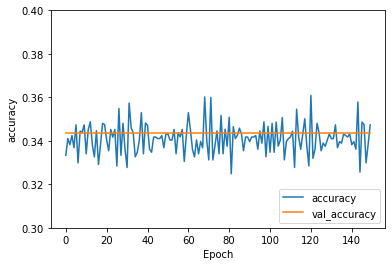

In [23]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.3, 0.4])
plt.legend(loc='lower right')

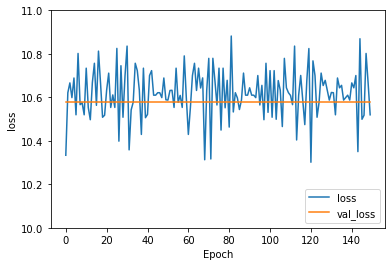

In [20]:

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([10, 11])
plt.legend(loc='lower right')

In [11]:

# evaluating the model
model.evaluate_generator(generator=valid_generator,
                         steps=valid_generator.n//valid_generator.batch_size)

[10.577500083229758, 0.34375]

In [12]:

# predict the output
test_generator.reset()
pred = model.predict_generator(test_generator,
                               steps=test_generator.n//test_generator.batch_size,
                               verbose=1)

1821/1821 [==============================] - 62s 34ms/step


In [13]:
# reset the test generator
predicted_class_indices = np.argmax(pred,axis=1)

In [14]:
tmp_filenames = [id[0:10] for id in test_generator.filenames]
filenames=[]
for file in tmp_filenames:
    f = file.split('.')
    filenames.append(f[0])
    
df = pd.DataFrame({'image_id': filenames})
df = df.join(pd.DataFrame(data=pred, columns=columns))

In [15]:
df.head(10)


,image_id,healthy,multiple_diseases,rust,scab
0,Test_0,0.0,0.0,1.0,0.0
1,Test_1,0.0,0.0,1.0,0.0
2,Test_2,0.0,0.0,1.0,0.0
3,Test_3,0.0,0.0,1.0,0.0
4,Test_4,0.0,0.0,1.0,0.0
5,Test_5,0.0,0.0,1.0,0.0
6,Test_6,0.0,0.0,1.0,0.0
7,Test_7,0.0,0.0,1.0,0.0
8,Test_8,0.0,0.0,1.0,0.0
9,Test_9,0.0,0.0,1.0,0.0


In [17]:
df.to_csv("lineaire100epochs.csv", index=False)